In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [3]:
print(torch.__version__)

1.9.0+cu102


In [4]:
import pandas as pd
import seaborn as sn

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
df = pd.read_csv('Sample_IssueDataset.csv') 

In [7]:
df.head()

,Activity on Company Forums,EmployeeLeft,Hired through SMTP,National Origin (code),Negative Review in Past 5 Years,"Survey, Relative, Attitude toward Peers","Survey, Relative, Peer's Average Attitude toward Environment","Survey, Relative, Peer's Average Attitude toward Resources","Survey, Relative, Peer's Average Attitude toward WorkType","Survey, Relative, Peer's Average Attitude toward Workload","Survey, Relative, Peer's Average Review of Employee",University
0,28.0,0.0,1,6,0,1,4,1,2,2,4,Smolensk Humanitarian University
1,45.0,1.0,0,7,0,5,5,2,6,4,1,Universitas Negeri Jakarta
2,36.0,1.0,0,4,1,1,4,1,2,3,6,Kyrgyz National University
3,41.0,1.0,1,4,0,4,4,1,3,6,5,Americanos College
4,42.0,1.0,1,3,0,2,5,3,1,4,2,Smolensk Humanitarian University


In [8]:
df1 = pd.get_dummies(df)

In [9]:
df1.head()

,Activity on Company Forums,EmployeeLeft,Hired through SMTP,National Origin (code),Negative Review in Past 5 Years,"Survey, Relative, Attitude toward Peers","Survey, Relative, Peer's Average Attitude toward Environment","Survey, Relative, Peer's Average Attitude toward Resources","Survey, Relative, Peer's Average Attitude toward WorkType","Survey, Relative, Peer's Average Attitude toward Workload","Survey, Relative, Peer's Average Review of Employee",University_Americanos College,University_Kyrgyz National University,University_Rice University,University_Smolensk Humanitarian University,University_Universitas Negeri Jakarta,University_Universitas Pasundan,University_University of Commerce Luigi Bocconi
0,28.0,0.0,1,6,0,1,4,1,2,2,4,0,0,0,1,0,0,0
1,45.0,1.0,0,7,0,5,5,2,6,4,1,0,0,0,0,1,0,0
2,36.0,1.0,0,4,1,1,4,1,2,3,6,0,1,0,0,0,0,0
3,41.0,1.0,1,4,0,4,4,1,3,6,5,1,0,0,0,0,0,0
4,42.0,1.0,1,3,0,2,5,3,1,4,2,0,0,0,1,0,0,0


In [10]:
y = df1.iloc[:,1]
X = df1.iloc[:,:18]

In [11]:
X = X.drop(columns=['EmployeeLeft'])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
X_train.shape

(9380, 17)

In [15]:

X_train_torch = torch.tensor(X_train.values)
X_test_torch = torch.tensor(X_test.values)
y_train_torch = torch.tensor(y_train.values)
y_test_torch = torch.tensor(y_test.values)

In [16]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


In [17]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(9380*17, 10),
            nn.ReLU(),
            #nn.Linear(9380*17, 10),
            #nn.ReLU(),
            nn.Linear(9380*17, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [18]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=159460, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=159460, out_features=10, bias=True)
  )
)


In [19]:
#flatten = nn.Flatten()
#flat_image = flatten(X_train_torch)

In [20]:
#logits = model(X_train_torch)
#pred_probab = nn.Softmax(dim=1)(logits)
#y_pred = pred_probab.argmax(1)
#print(f"Predicted class: {y_pred}")

In [21]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=159460, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=159460, out_features=10, bias=True)
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([10, 159460]) | Values : tensor([[ 0.0021,  0.0005, -0.0006,  ...,  0.0012,  0.0025, -0.0006],
        [-0.0018,  0.0017,  0.0004,  ...,  0.0019,  0.0004, -0.0023]],
       grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([10]) | Values : tensor([-0.0002, -0.0025], grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([10, 159460]) | Values : tensor([[ 2.2240e-03,  1.5629e-03, -3.5274e-05,  ..., -2.1881e-03,
          1.1680e-03,  2.2161e-03],
        [-4.0773e-04,  7.5271e-04, -6.1478e-04,  ..., -1.7303e-03,
         -1.2340e-03,  5.1837e-04]], grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.2.bias | Size: torch.

In [22]:
import torch
 
train_features = torch.tensor(X_train.to_numpy())
train_labels = torch.tensor(y_train.to_numpy())
 
validation_features = torch.tensor(X_test.to_numpy())
validation_labels = torch.tensor(y_test.to_numpy())

In [23]:
n_features = X_train.shape[1]
# 31
model = torch.nn.Sequential(torch.nn.Linear(n_features, 18),
                            torch.nn.ReLU(),
                            torch.nn.Linear(18, 1),
                            torch.nn.Sigmoid())

In [24]:
criterion = torch.nn.BCELoss()
 
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.001)

In [25]:
X_train_torch.shape
y_train_torch.shape

torch.Size([9380])

In [26]:
n_batches = 2
train_features_batched = train_features.reshape(n_batches,
                                               int(train_features.shape[0]/n_batches),
                                               train_features.shape[1])
train_labels_batched = train_labels.reshape(n_batches,
                                            int(train_labels.shape[0]/n_batches))


Finished Training


Text(0, 0.5, 'BCE Loss')

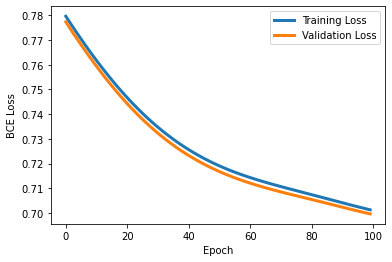

In [27]:
n_epochs = 100
loss_list = []
validate_loss_list = []
 
for epoch in range(n_epochs):
    for batch_idx in range(n_batches):
        optimizer.zero_grad()
         
        outputs = model(train_features_batched[batch_idx].float())
         
     
        loss = criterion(outputs.flatten().float(),
                         train_labels_batched[batch_idx].float())
     
         
        loss.backward()
         
        optimizer.step()
         
    outputs = model(train_features.float())
     
    validation_outputs = model(validation_features.float())
     
         
    loss = criterion(outputs.flatten().float(),
                     train_labels.float())
     
    validate_loss = criterion(validation_outputs.flatten().float(),
                              validation_labels.float())
     
    loss_list.append(loss.item())
     
    validate_loss_list.append(validate_loss)
 
print('Finished Training')
 
import matplotlib.pyplot as plt
plt.plot(loss_list, linewidth=3)
plt.plot(validate_loss_list, linewidth=3)
plt.legend(("Training Loss", "Validation Loss"))
plt.xlabel("Epoch")
plt.ylabel("BCE Loss")

In [ ]:
#https://danielmuellerkomorowska.com/2021/02/03/a-deep-feedforward-network-in-pytorch-for-the-titanic-challenge/

In [34]:
y_pred = model(validation_features[1].flatten().float())

In [35]:
print(y_pred)

tensor([0.6552], grad_fn=<SigmoidBackward>)


In [28]:
import matplotlib.pyplot as plt
import numpy as np

In [42]:
type(validation_features.flatten().float())

torch.Tensor

In [43]:
model.eval()


Sequential(
  (0): Linear(in_features=17, out_features=18, bias=True)
  (1): ReLU()
  (2): Linear(in_features=18, out_features=1, bias=True)
  (3): Sigmoid()
)

In [46]:
y_pred = model(validation_features[0].flatten().float())

In [47]:
len(y_pred)

1

In [48]:
len(validation_features[0].flatten().float())

17

In [49]:
#before_train = criterion(y_pred.squeeze(), validation_features[0].flatten().float())
#print('Test loss before training' , before_train.item())

In [56]:
model.train()
epochs = 5
errors = []
for epoch in range(epochs):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(train_features.float())
    # Compute Loss
    loss = criterion(y_pred.squeeze(), train_labels.float())
    errors.append(loss.item())
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    optimizer.step()

Epoch 0: train loss: 0.5819905996322632
Epoch 1: train loss: 0.5819854140281677
Epoch 2: train loss: 0.5819800496101379
Epoch 3: train loss: 0.5819748640060425
Epoch 4: train loss: 0.5819694995880127


In [61]:
model.train()
epochs = 500
errors = []
for epoch in range(epochs):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(validation_features.float())
    # Compute Loss
    loss = criterion(y_pred.squeeze(), validation_labels.float())
    errors.append(loss.item())
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    optimizer.step()

Epoch 0: train loss: 0.5969156622886658
Epoch 1: train loss: 0.5968466997146606
Epoch 2: train loss: 0.5968162417411804
Epoch 3: train loss: 0.5967983603477478
Epoch 4: train loss: 0.5967743992805481
Epoch 5: train loss: 0.596733033657074
Epoch 6: train loss: 0.5966682434082031
Epoch 7: train loss: 0.5965898633003235
Epoch 8: train loss: 0.5965098738670349
Epoch 9: train loss: 0.5964379906654358
Epoch 10: train loss: 0.596376359462738
Epoch 11: train loss: 0.596325695514679
Epoch 12: train loss: 0.5962839722633362
Epoch 13: train loss: 0.5962439775466919
Epoch 14: train loss: 0.5962004661560059
Epoch 15: train loss: 0.5961532592773438
Epoch 16: train loss: 0.5961018204689026
Epoch 17: train loss: 0.5960473418235779
Epoch 18: train loss: 0.595991313457489
Epoch 19: train loss: 0.5959361791610718
Epoch 20: train loss: 0.5958823561668396
Epoch 21: train loss: 0.5958293676376343
Epoch 22: train loss: 0.5957791805267334
Epoch 23: train loss: 0.5957310795783997
Epoch 24: train loss: 0.595686

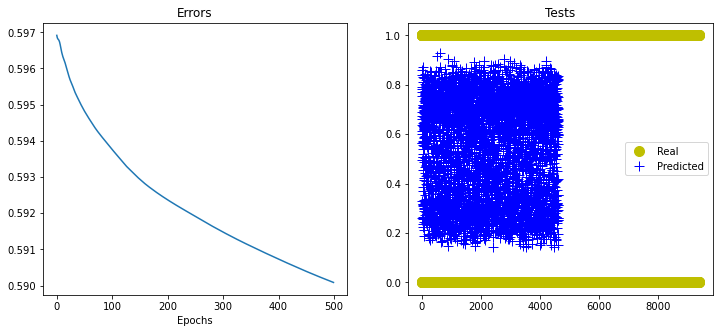

In [62]:
import matplotlib.pyplot as plt
import numpy as np
def plotcharts(errors):
    errors = np.array(errors)
    plt.figure(figsize=(12, 5))
    graf02 = plt.subplot(1, 2, 1) # nrows, ncols, index
    graf02.set_title('Errors')
    plt.plot(errors, '-')
    plt.xlabel('Epochs')
    graf03 = plt.subplot(1, 2, 2)
    graf03.set_title('Tests')
    a = plt.plot(train_labels.numpy(), 'yo', label='Real')
    plt.setp(a, markersize=10)
    a = plt.plot(y_pred.detach().numpy(), 'b+', label='Predicted')
    plt.setp(a, markersize=10)
    plt.legend(loc=7)
    plt.show()
plotcharts(errors)

In [63]:
model.eval()
y_pred = model(validation_features.float())
after_train = criterion(y_pred.squeeze(), validation_labels.float())
print('Test loss after Training' , after_train.item())

Test loss after Training 0.5900818109512329


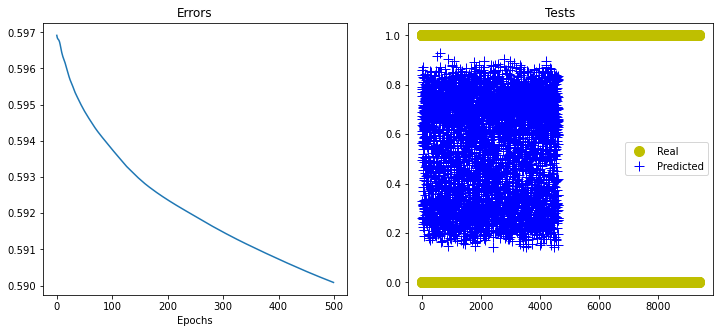

In [64]:
import matplotlib.pyplot as plt
import numpy as np
def plotcharts(errors):
    errors = np.array(errors)
    plt.figure(figsize=(12, 5))
    graf02 = plt.subplot(1, 2, 1) # nrows, ncols, index
    graf02.set_title('Errors')
    plt.plot(errors, '-')
    plt.xlabel('Epochs')
    graf03 = plt.subplot(1, 2, 2)
    graf03.set_title('Tests')
    a = plt.plot(train_labels.numpy(), 'yo', label='Real')
    plt.setp(a, markersize=10)
    a = plt.plot(y_pred.detach().numpy(), 'b+', label='Predicted')
    plt.setp(a, markersize=10)
    plt.legend(loc=7)
    plt.show()
plotcharts(errors)

In [65]:
probs = torch.sigmoid(y_pred)
print(probs)

tensor([[0.6982],
        [0.6882],
        [0.6542],
        ...,
        [0.6694],
        [0.6589],
        [0.5878]], grad_fn=<SigmoidBackward>)
